[link](https://www.reddit.com/r/probabilitytheory/comments/a4xt10/interesting_probability_problem/)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
def simulate_one_round(m = 10,n = 10):
    # initialize the situation when no day is filled
    initial_state = np.zeros((m,n))
    # randomly select day after day until all are selected
    # pick without replacement
    sticks = np.random.choice(m*n, size=m*n,replace=False)
    # to make sure we always start with the initial state
    current_state = initial_state
    for ii, position in enumerate(sticks): # go through the date selecting
        # flatten the 2D matrix so that it would be easier for me to process
        current_state = current_state.flatten()
        # the position is the day heppen to indicate the date as well
        # if selected, marked 1
        current_state[position] = 1
        # reshape the flattened vector back to the 2D matrix
        current_state = current_state.reshape(m,n)
        # checkpoint
        # if:
        # 1) one row is filled, meaning if we sum along the columns, we will get one of the element becomes 10
        # 2) one column is filled
        if (current_state.sum(0) == 10).any() or (current_state.sum(1) == 10).any():
            break
    return ii + 1 # return the time of selecting, which is the enumerator + 1

In [3]:
n_sim = int(1e5) # let's simulate this game for lots of times
results = np.array([simulate_one_round(10,10) for sim in tqdm(range(n_sim))])

100%|█████████████████████████████████| 100000/100000 [02:41<00:00, 620.41it/s]


# Plot the distribution of time needed to get a row or a column filled

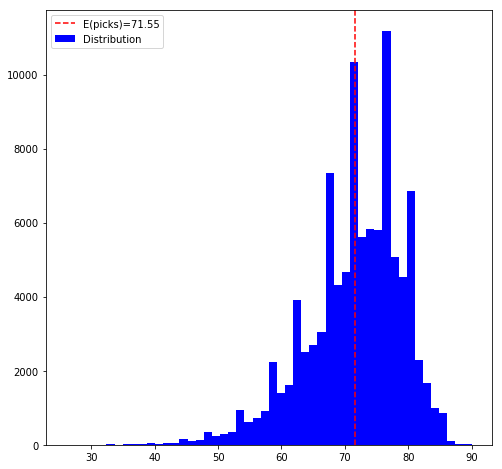

In [4]:
fig,ax = plt.subplots(figsize=(8,8))
_=ax.hist(results,bins=50,label='Distribution',color='blue')
_=ax.axvline(results.mean(),linestyle='--',color='red',label='E(picks)={:.2f}'.format(results.mean()))
ax.legend()

# Above is the end of the question from reddit, but what if the time table was not squared?

In [5]:
range_row = np.arange(5,21)
range_col = np.arange(5,21)
n_sim = int(1e4)
results = np.zeros((len(range_row),len(range_col),n_sim))
for ii,n_row in enumerate(range_row):
    for jj,n_col in enumerate(range_col):
        results[ii,jj,:] = np.array([simulate_one_round(n_row,n_col) for sim in tqdm(range(n_sim))])

100%|███████████████████████████████████| 10000/10000 [00:19<00:00, 515.10it/s]


100%|███████████████████████████████████| 10000/10000 [00:22<00:00, 450.66it/s]


In [8]:
import seaborn as sns
sns.set_context('poster')

# x axis is the number of columns of the time table, y axis is the number of rows of the time table

# Number in each cell means the average times of random selecting needed to fill one row or one column

## Obviously, more rows and more columns require more times, but one interesting finding here is that when n_rows and n_columns are both 9, the average times of random selecting needed to fill one row or one column is greater than when both are 12

## could be a simulation error, so we shall repeat the simulation multiple times to check if what we get survives the chance level.

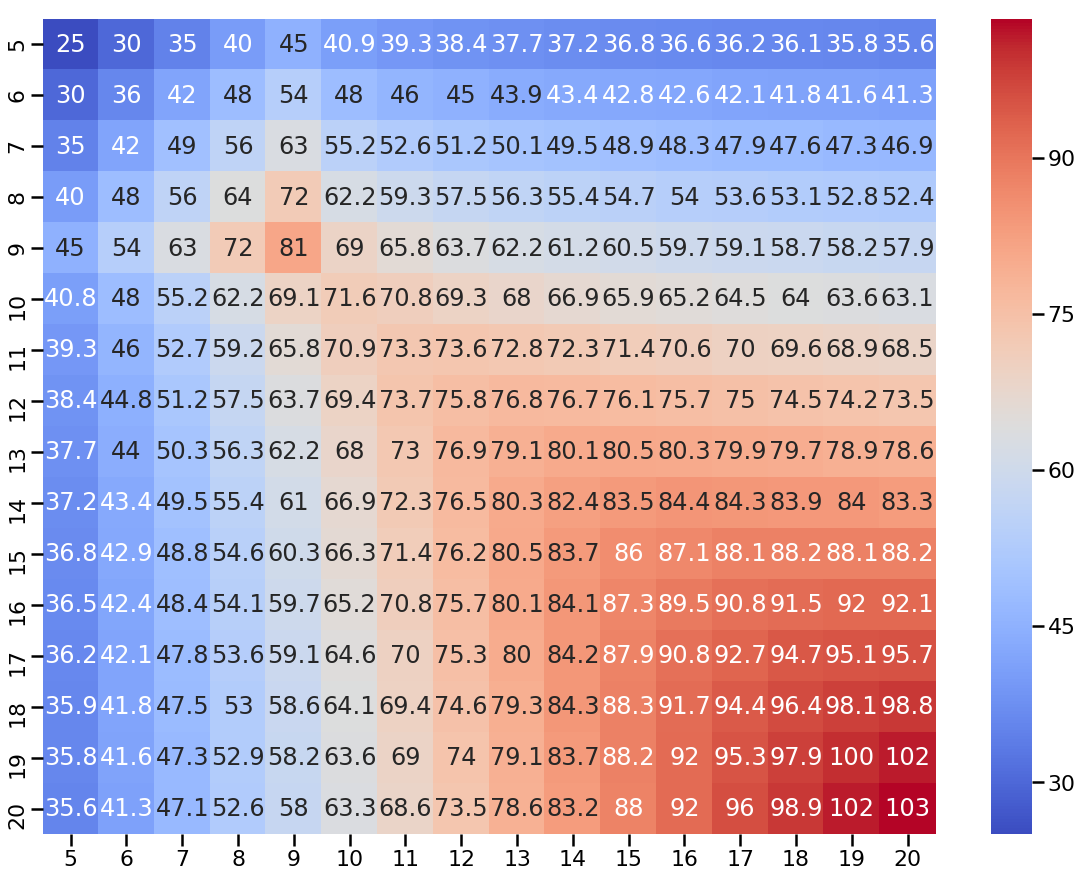

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(results.mean(-1),cmap = 'coolwarm',annot = True,ax=ax,fmt='.3g')
_=ax.set(xticklabels=range_row,
       yticklabels=range_col,)